<a href="https://colab.research.google.com/github/adiazvarela/restaurant_revenue_predictions/blob/main/Project_1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Read csv file using pandas

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/adiazvarela/restaurant_revenue_predictions/main/restaurant_data.csv')

In [3]:
dataset

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,434653.45
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,No,37,21,414977.92
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,930395.87
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,311493.48


Checking dataset for null or NaN values

In [4]:
pd.isnull(dataset).head(100)


,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
pd.isnull(dataset).tail(10)

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
8358,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8359,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8360,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8361,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8362,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8363,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8364,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8365,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8366,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8367,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Exploring Dataset

In [6]:
dataset['Location'].value_counts()

Location
Downtown    2821
Suburban    2785
Rural       2762
Name: count, dtype: int64

In [7]:
dataset['Cuisine'].value_counts()

Cuisine
French      1433
American    1416
Italian     1413
Mexican     1393
Indian      1369
Japanese    1344
Name: count, dtype: int64

In [8]:
dataset[['Social Media Followers','Marketing Budget','Average Meal Price']].describe()

,Social Media Followers,Marketing Budget,Average Meal Price
count,8368.000000,8368.000000,8368.000000
mean,36190.621773,3218.254900,47.896659
std,18630.153330,1824.896053,14.336767
min,5277.000000,604.000000,25.000000
25%,22592.500000,1889.000000,35.490000
50%,32518.500000,2846.500000,45.535000
75%,44566.250000,4008.500000,60.300000
max,103777.000000,9978.000000,76.000000


In [9]:
dataset['Revenue'].max()

1531867.55

In [10]:
dataset['Revenue'].min()

184708.52

In [11]:
dataset['Revenue'].mean()

656070.5633508605

In [12]:
dataset['Revenue'].std()

267413.73703016806

Droping columns and preparing dataset

In [13]:
set = dataset.drop(['Name', 'Rating', 'Chef Experience Years', 'Number of Reviews', 'Avg Review Length', 'Ambience Score', 'Service Quality Score', 'Parking Availability', 'Weekend Reservations', 'Weekday Reservations'], axis =1)

In [14]:
set

,Location,Cuisine,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Revenue
0,Rural,Japanese,38,73.98,2224,23406,638945.52
1,Downtown,Mexican,76,28.11,4416,42741,490207.83
2,Rural,Italian,48,48.29,2796,37285,541368.62
3,Rural,Italian,34,51.55,1167,15214,404556.80
4,Downtown,Japanese,88,75.98,3639,40171,1491046.35
...,...,...,...,...,...,...,...
8363,Suburban,Indian,54,34.85,1102,11298,434653.45
8364,Rural,Indian,49,36.88,1988,20432,414977.92
8365,Downtown,Italian,88,46.87,5949,63945,930395.87
8366,Rural,American,31,44.53,707,7170,311493.48


In [15]:
set[['Cuisine', 'Location']].value_counts()

Cuisine   Location
French    Rural       499
American  Downtown    494
Indian    Suburban    489
Japanese  Rural       485
Mexican   Downtown    482
French    Downtown    482
Italian   Downtown    481
American  Suburban    479
Mexican   Suburban    471
Italian   Suburban    468
          Rural       464
French    Suburban    452
Indian    Downtown    449
American  Rural       443
Mexican   Rural       440
Japanese  Downtown    433
Indian    Rural       431
Japanese  Suburban    426
Name: count, dtype: int64

In [20]:
locations_encoded = pd.get_dummies(dataset['Location'])

In [21]:
locations_encoded

,Downtown,Rural,Suburban
0,False,True,False
1,True,False,False
2,False,True,False
3,False,True,False
4,True,False,False
...,...,...,...
8363,False,False,True
8364,False,True,False
8365,True,False,False
8366,False,True,False


In [40]:
new_set = set.drop(['Location', 'Cuisine'], axis = 1)

In [41]:
new_set

,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Revenue
0,38,73.98,2224,23406,638945.52
1,76,28.11,4416,42741,490207.83
2,48,48.29,2796,37285,541368.62
3,34,51.55,1167,15214,404556.80
4,88,75.98,3639,40171,1491046.35
...,...,...,...,...,...
8363,54,34.85,1102,11298,434653.45
8364,49,36.88,1988,20432,414977.92
8365,88,46.87,5949,63945,930395.87
8366,31,44.53,707,7170,311493.48


Concat encoded Location and Cuisine columns

In [42]:
new_set_corr = pd.concat([new_set, locations_encoded], axis = 1)

Assigning dataset to a new variable to create a correlation matrix

In [43]:
new_set_corr

,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Revenue,Downtown,Rural,Suburban
0,38,73.98,2224,23406,638945.52,False,True,False
1,76,28.11,4416,42741,490207.83,True,False,False
2,48,48.29,2796,37285,541368.62,False,True,False
3,34,51.55,1167,15214,404556.80,False,True,False
4,88,75.98,3639,40171,1491046.35,True,False,False
...,...,...,...,...,...,...,...,...
8363,54,34.85,1102,11298,434653.45,False,False,True
8364,49,36.88,1988,20432,414977.92,False,True,False
8365,88,46.87,5949,63945,930395.87,True,False,False
8366,31,44.53,707,7170,311493.48,False,True,False


Creating a correlation matrix

In [44]:
corr_set = new_set_corr.corr()

In [27]:
corr_set

,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Revenue,Downtown,Rural,Suburban,American,French,Indian,Italian,Japanese,Mexican
Seating Capacity,1.000000,-0.028809,0.509560,0.496917,0.677317,0.814315,-0.811398,-0.007211,0.016810,-0.010265,0.008924,0.006770,-0.029894,0.007256
Average Meal Price,-0.028809,1.000000,-0.002054,-0.005753,0.686365,-0.010335,0.036249,-0.025806,-0.234287,0.400996,-0.382676,0.076984,0.687995,-0.545283
Marketing Budget,0.509560,-0.002054,1.000000,0.987511,0.365322,0.622723,-0.316364,-0.309008,0.009743,-0.003619,-0.003892,0.009984,-0.005476,-0.006925
Social Media Followers,0.496917,-0.005753,0.987511,1.000000,0.354466,0.608523,-0.306920,-0.304187,0.010324,-0.006644,-0.001934,0.009763,-0.006615,-0.005049
Revenue,0.677317,0.686365,0.365322,0.354466,1.000000,0.561424,-0.540518,-0.023827,-0.153806,0.279023,-0.263733,0.061815,0.461150,-0.382196
Downtown,0.814315,-0.010335,0.622723,0.608523,0.561424,1.000000,-0.500562,-0.503676,0.011220,-0.000731,-0.008552,0.003140,-0.013829,0.008412
Rural,-0.811398,0.036249,-0.316364,-0.306920,-0.540518,-0.500562,1.000000,-0.495752,-0.016521,0.017549,-0.014332,-0.001618,0.028648,-0.013497
Suburban,-0.007211,-0.025806,-0.309008,-0.304187,-0.023827,-0.503676,-0.495752,1.000000,0.005231,-0.016779,0.022882,-0.001536,-0.014714,0.005030
American,0.016810,-0.234287,0.009743,0.010324,-0.153806,0.011220,-0.016521,0.005231,1.000000,-0.205152,-0.199600,-0.203423,-0.197417,-0.201688
French,-0.010265,0.400996,-0.003619,-0.006644,0.279023,-0.000731,0.017549,-0.016779,-0.205152,1.000000,-0.201041,-0.204891,-0.198842,-0.203144


Creating a heatmap with correlation matrix

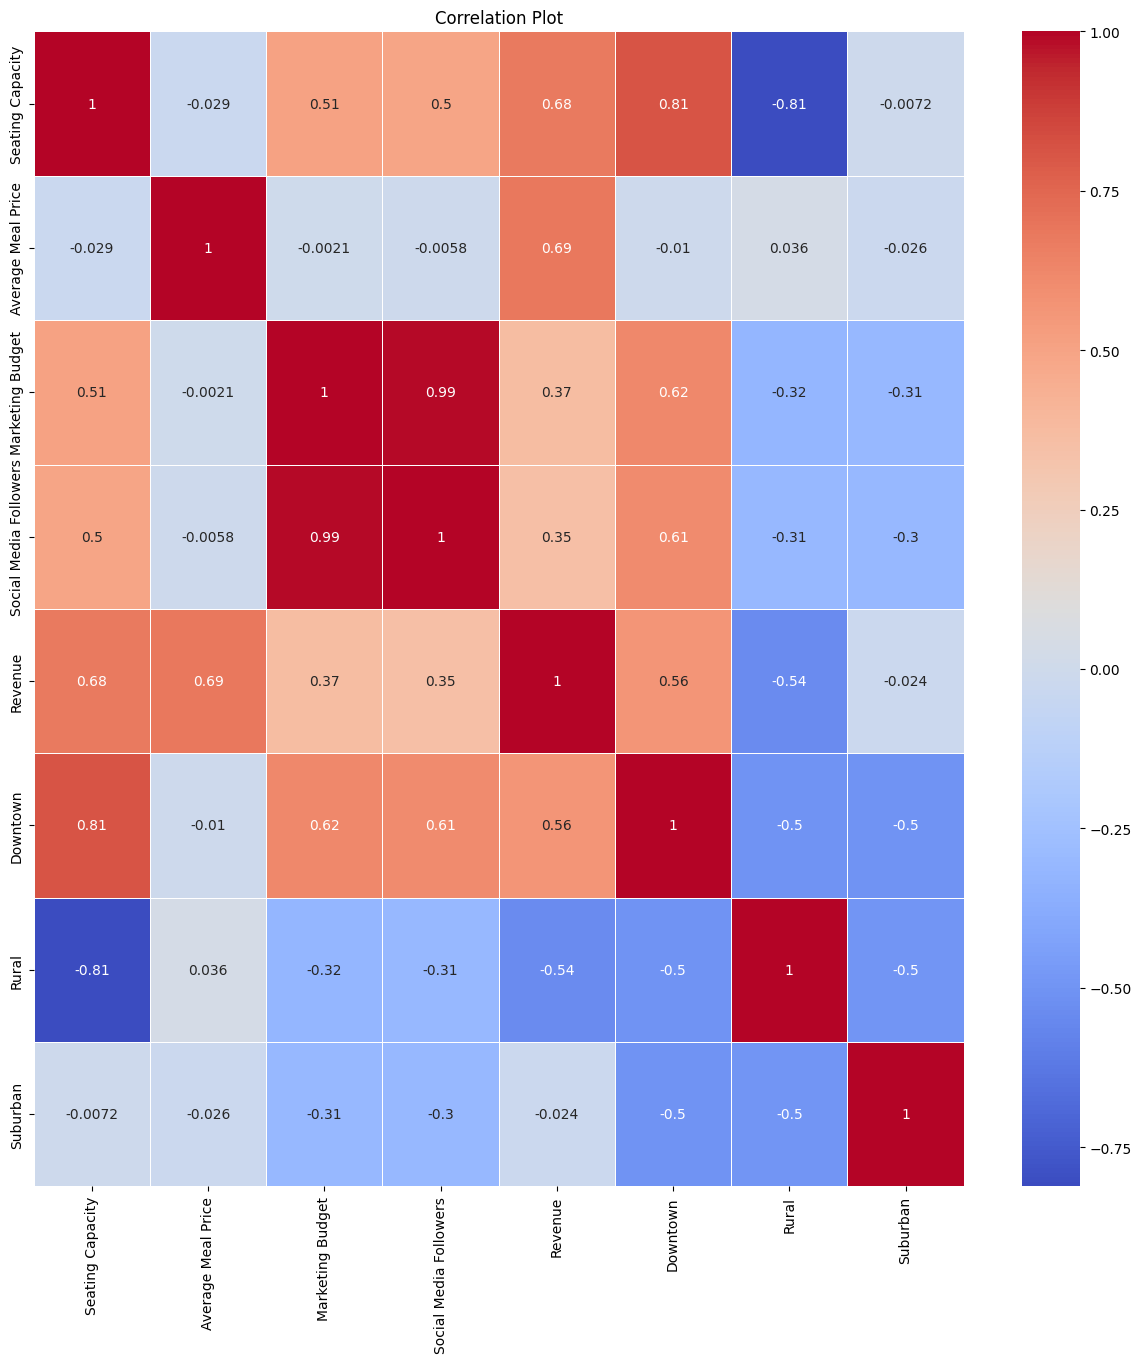

In [45]:
plt.figure(figsize = (15,15))
sns.heatmap(corr_set, annot = True, cmap = 'coolwarm', linewidth = .5)
plt.title('Correlation Plot')
plt.show()

Assigning a new variable for the final set to be used as the X variable by seperating dropping column to be used for Y variable

In [46]:
final_set = new_set_corr.drop(['Revenue'], axis = 1)

In [47]:
final_set

,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Downtown,Rural,Suburban
0,38,73.98,2224,23406,False,True,False
1,76,28.11,4416,42741,True,False,False
2,48,48.29,2796,37285,False,True,False
3,34,51.55,1167,15214,False,True,False
4,88,75.98,3639,40171,True,False,False
...,...,...,...,...,...,...,...
8363,54,34.85,1102,11298,False,False,True
8364,49,36.88,1988,20432,False,True,False
8365,88,46.87,5949,63945,True,False,False
8366,31,44.53,707,7170,False,True,False


Assigning X and Y variables

In [48]:
x = final_set

In [49]:
y = dataset['Revenue']

In [50]:
y

0        638945.52
1        490207.83
2        541368.62
3        404556.80
4       1491046.35
           ...    
8363     434653.45
8364     414977.92
8365     930395.87
8366     311493.48
8367     534142.98
Name: Revenue, Length: 8368, dtype: float64

In [51]:
len(x)

8368

In [52]:
len(y)

8368

Splitting dataset for training and testing

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= .3, random_state= 42)

Scaling features

In [54]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Building and training model

In [55]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

Testing model

In [56]:
y_pred = model.predict(x_test_scaled)

Evaluating model

In [57]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

R2: 0.957024951313785
Mean Squared Error: 3060048275.8722153
Root Mean Squared Error: 55317.70309649719
Mean Absolute Error: 41937.8336393376


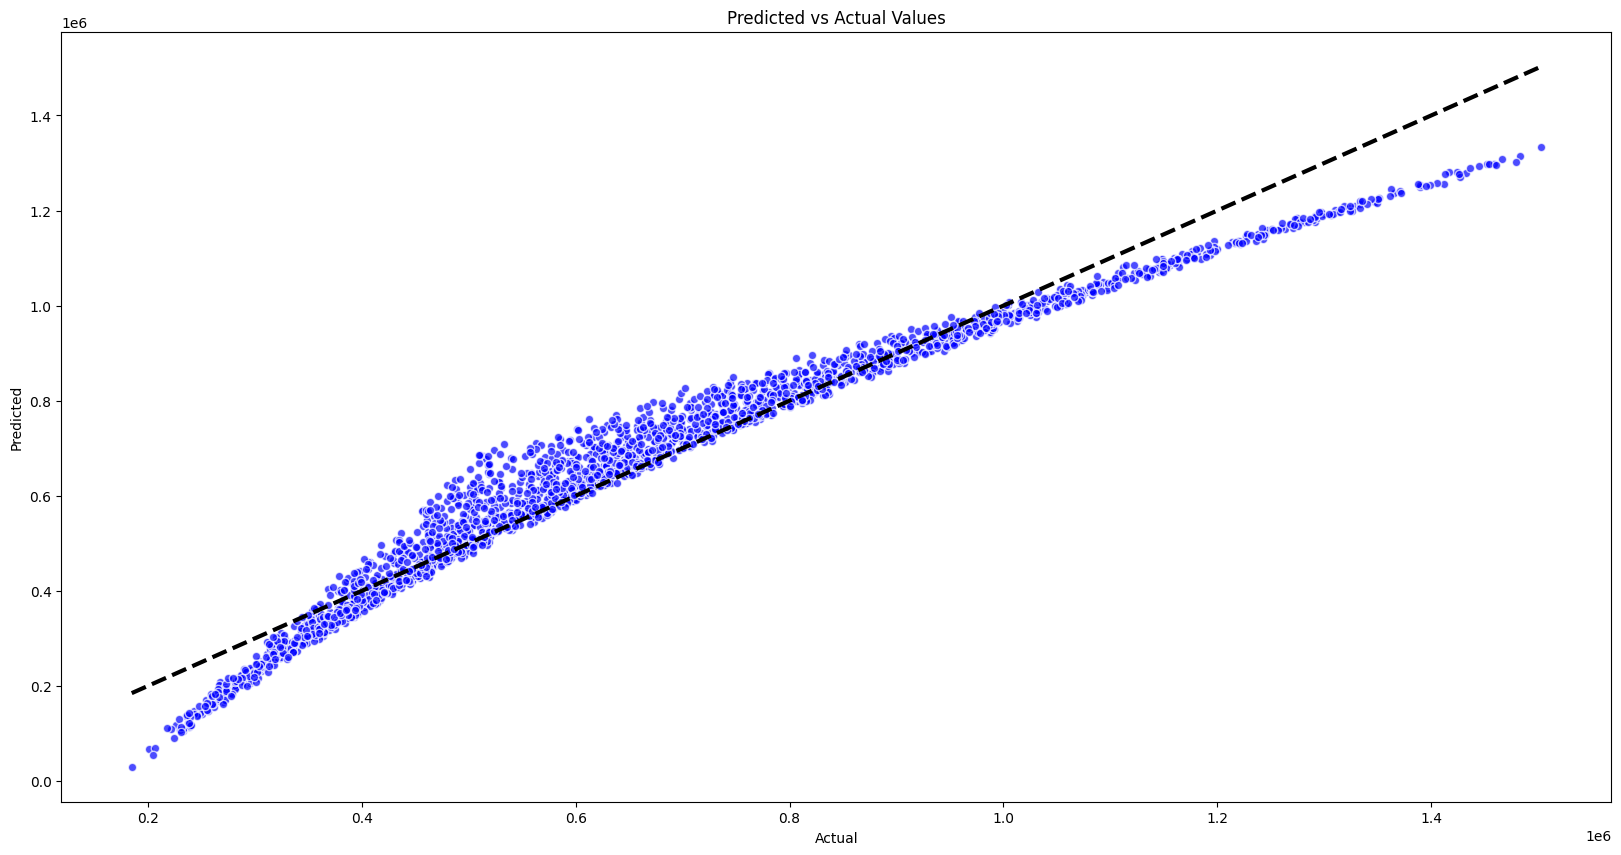

In [58]:
plt.figure(figsize = (20,10))
plt.scatter(y_test, y_pred, color = 'blue', edgecolor = 'w', alpha = .7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.show()

In [59]:
x_corr = x.corr()

In [60]:
x_corr

,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Downtown,Rural,Suburban
Seating Capacity,1.000000,-0.028809,0.509560,0.496917,0.814315,-0.811398,-0.007211
Average Meal Price,-0.028809,1.000000,-0.002054,-0.005753,-0.010335,0.036249,-0.025806
Marketing Budget,0.509560,-0.002054,1.000000,0.987511,0.622723,-0.316364,-0.309008
Social Media Followers,0.496917,-0.005753,0.987511,1.000000,0.608523,-0.306920,-0.304187
Downtown,0.814315,-0.010335,0.622723,0.608523,1.000000,-0.500562,-0.503676
Rural,-0.811398,0.036249,-0.316364,-0.306920,-0.500562,1.000000,-0.495752
Suburban,-0.007211,-0.025806,-0.309008,-0.304187,-0.503676,-0.495752,1.000000


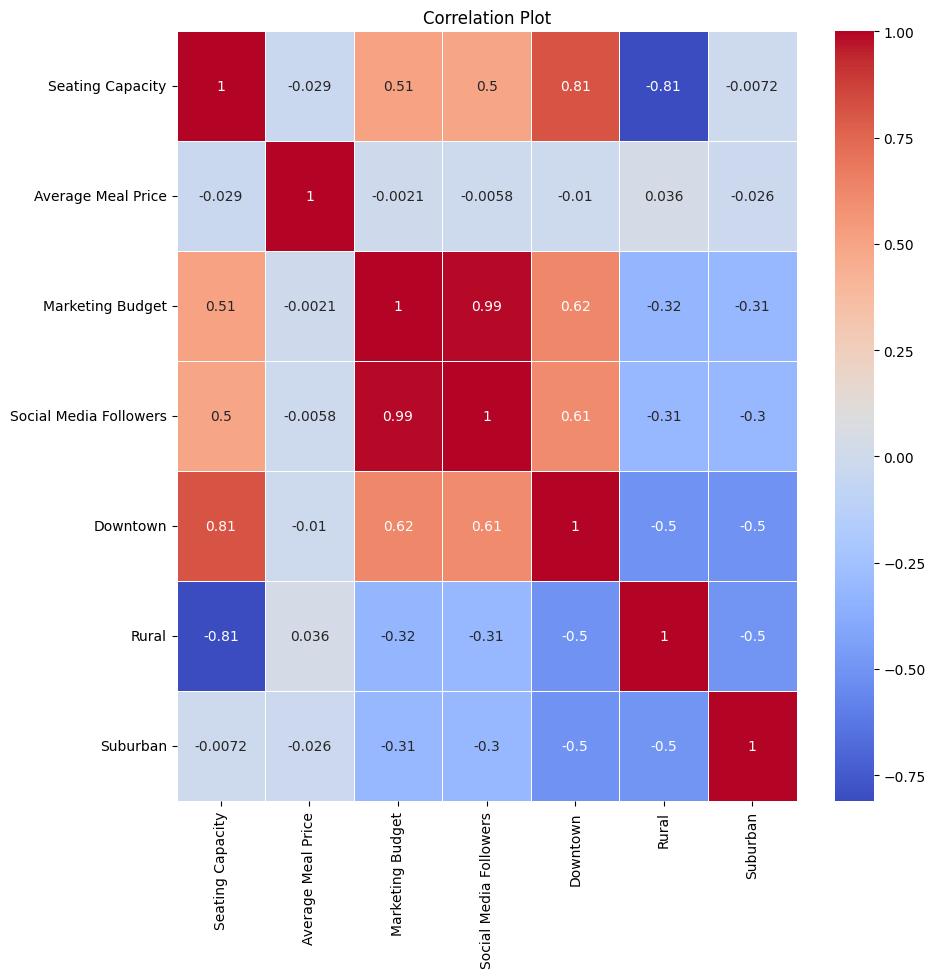

In [62]:
plt.figure(figsize = (10,10))
sns.heatmap(x_corr, annot = True, cmap = 'coolwarm', linewidth = .5)
plt.title('Correlation Plot')
plt.show()